In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-instagram-influencers/top_influencers.csv.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/top-instagram-influencers/top_influencers.csv.csv')
df.head()


,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [3]:
print(df.isnull().sum())

df.dropna(inplace=True)

rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       0
new_post_avg_like     0
total_likes           0
country              62
dtype: int64


In [4]:
df.drop(columns=['rank'], inplace=True)

In [5]:
df['followers'] = df['followers'].str.replace('m', '').astype(float) * 1_000_000

In [6]:
def convert_like_value(val):
    val = val.lower().strip()
    if 'k' in val:
        return float(val.replace('k', '')) * 1_000
    elif 'm' in val:
        return float(val.replace('m', '')) * 1_000_000
    else:
        return float(val)

df['new_post_avg_like'] = df['new_post_avg_like'].apply(convert_like_value)

In [7]:
def convert_social_value(val):
    val = val.lower().strip()
    if 'k' in val:
        return float(val.replace('k', '')) * 1_000
    elif 'm' in val:
        return float(val.replace('m', '')) * 1_000_000
    else:
        return float(val)

In [8]:
print(df['60_day_eng_rate'].unique()[:10])


['1.39%' '1.62%' '0.97%' '0.20%' '0.88%' '1.20%' '0.76%' '0.35%' '0.59%'
 '2.04%']


In [9]:
df['60_day_eng_rate'] = df['60_day_eng_rate'].str.replace('%', '').astype(float)

In [10]:
print(df['60_day_eng_rate'].dtype)

float64


In [11]:
def convert_to_number(val):
    if isinstance(val, str):
        val = val.strip().lower().replace(',', '')
        if 'm' in val:
            return float(val.replace('m', '')) * 1_000_000
        elif 'k' in val:
            return float(val.replace('k', '')) * 1_000
        else:
            return float(val)
    return val

df['followers'] = df['followers'].apply(convert_to_number)
df['avg_likes'] = df['avg_likes'].apply(convert_to_number)

****Followers vs Average Likes****

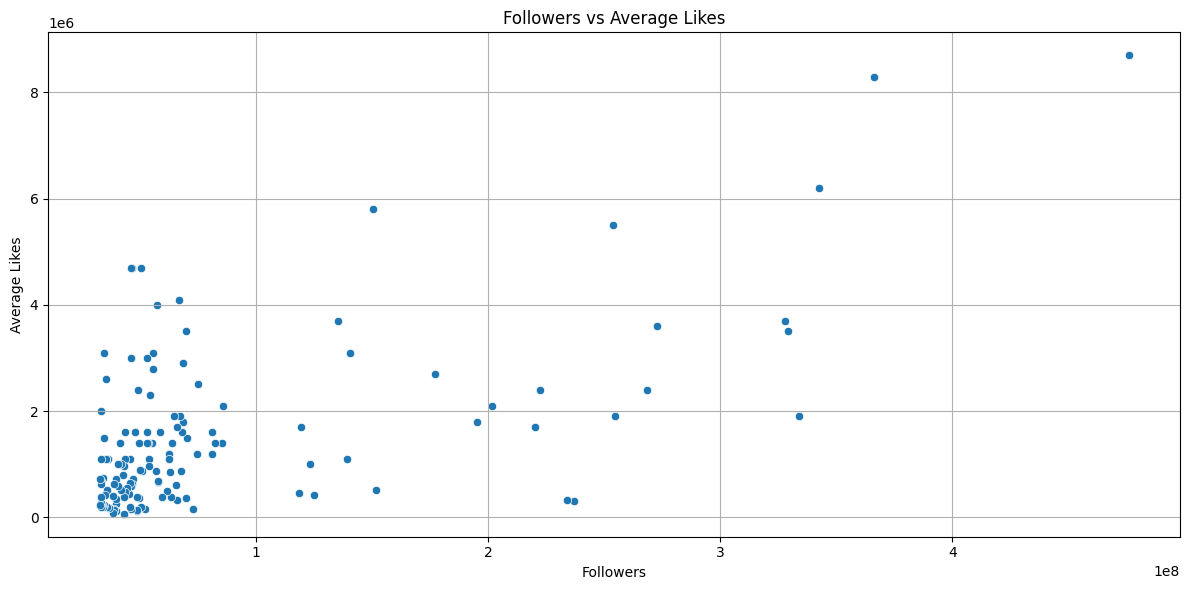

In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='followers', y='avg_likes')
plt.title('Followers vs Average Likes')
plt.xlabel('Followers')
plt.ylabel('Average Likes')
plt.grid(True)
plt.tight_layout()
plt.show()

****Country-wise Influencer Count****

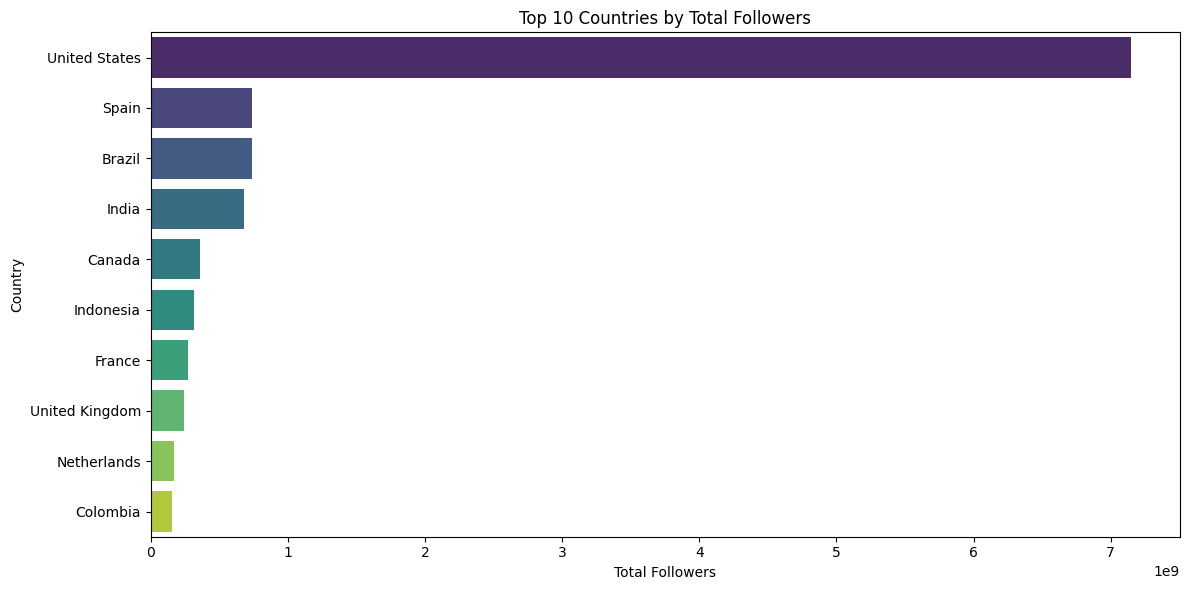

In [13]:
country_followers = df.groupby('country')['followers'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_followers.head(10).values, y=country_followers.head(10).index, palette='viridis')
plt.xlabel('Total Followers')
plt.ylabel('Country')
plt.title('Top 10 Countries by Total Followers')
plt.tight_layout()
plt.show()

****Followers vs 60-Day Engagement****

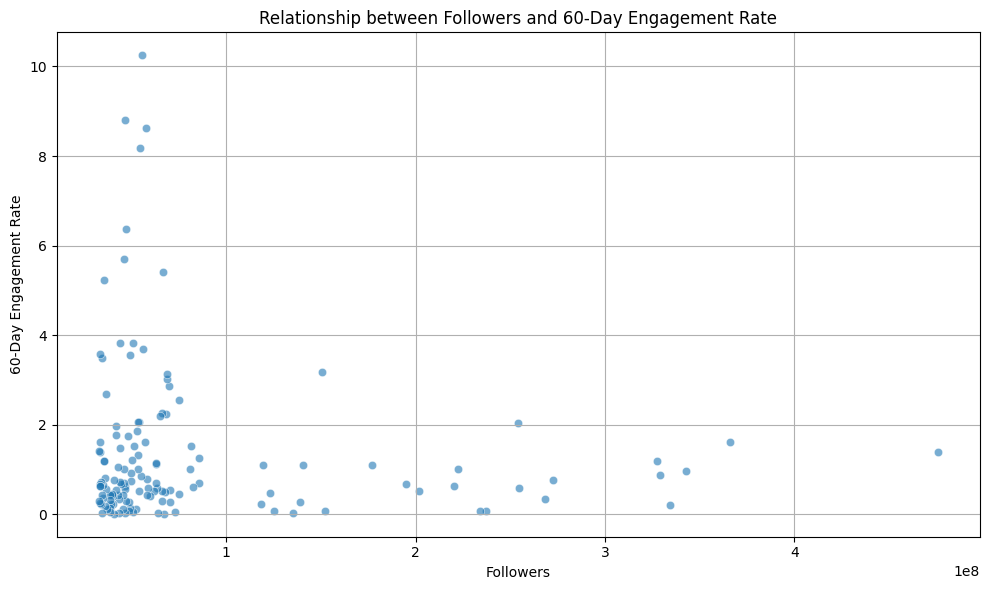

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['followers'], df['60_day_eng_rate'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Relationship between Followers and 60-Day Engagement Rate')
plt.xlabel('Followers')
plt.ylabel('60-Day Engagement Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

****Influence Score Distribution****

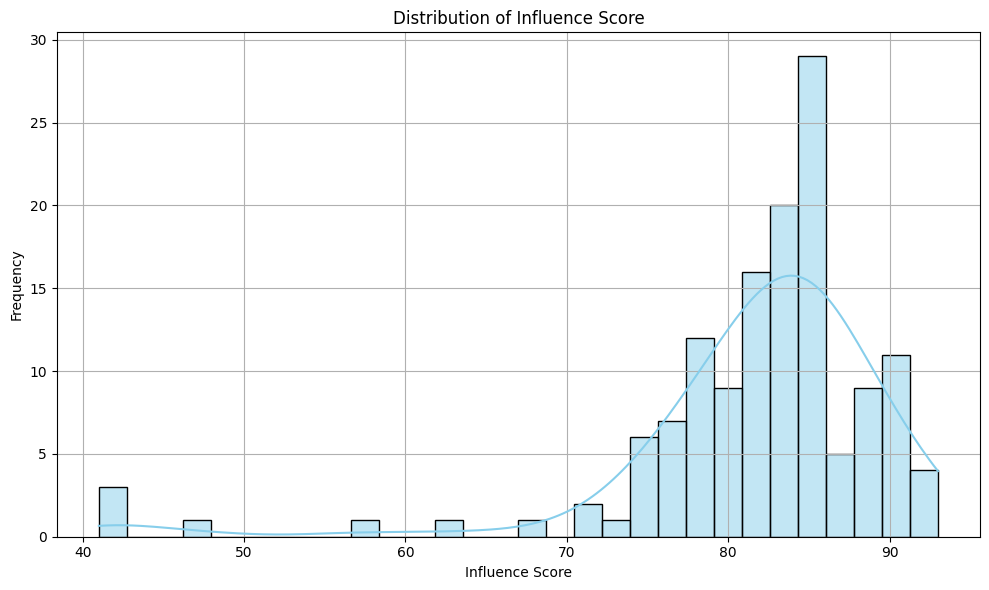

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['influence_score'], kde=True, color='skyblue', edgecolor='black', bins=30)
plt.title('Distribution of Influence Score')
plt.xlabel('Influence Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()